#  Limpeza e adequação da nomenclatura 

## Entrada dos dados

### Preparando ambiente

In [514]:
#importando bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando dados de julho de 2022

In [515]:
dados_brutos_julho = pd.read_csv('/content/precos-gasolina-etanol-julho.csv', sep=';')
dados_brutos_julho.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA


### Importando dados de agosto de 2022

In [516]:
dados_brutos_agosto = pd.read_csv('/content/precos-gasolina-etanol-agosto.csv', sep=';')
dados_brutos_agosto.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,"5,99",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,"4,99",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,"5,79",NaN,R$ / litro,BRANCA


## União, adequação de dados e de nomenclatura

### Modificação do padrão das datas

In [517]:
#dados de julho
dados_brutos_julho['Data da Coleta'] = pd.to_datetime(dados_brutos_julho['Data da Coleta'], dayfirst=True)
dados_brutos_julho['Data da Coleta'].head()

0   2022-07-01
1   2022-07-01
2   2022-07-01
3   2022-07-01
4   2022-07-01
Name: Data da Coleta, dtype: datetime64[ns]

In [518]:
#dados de agosto
dados_brutos_agosto['Data da Coleta'] = pd.to_datetime(dados_brutos_agosto['Data da Coleta'], dayfirst=True)
dados_brutos_agosto['Data da Coleta'].head()

0   2022-08-01
1   2022-08-01
2   2022-08-01
3   2022-08-01
4   2022-08-01
Name: Data da Coleta, dtype: datetime64[ns]

### União dos dataframes 

In [519]:
lista_dados = [dados_brutos_julho ,dados_brutos_agosto]
dados_brutos = pd.concat(lista_dados, ignore_index= True, verify_integrity=True)

### Momenclatura das colunas 

In [520]:
#modificacao do nome de columas
dados_brutos.columns = dados_brutos.columns.str.replace('- ','')
dados_brutos.columns = dados_brutos.columns.str.replace(' ','_')
dados_brutos.columns = dados_brutos.columns.str.lower()
dados_brutos.columns

Index(['regiao_sigla', 'estado_sigla', 'municipio', 'revenda',
       'cnpj_da_revenda', 'nome_da_rua', 'numero_rua', 'complemento', 'bairro',
       'cep', 'produto', 'data_da_coleta', 'valor_de_venda', 'valor_de_compra',
       'unidade_de_medida', 'bandeira'],
      dtype='object')

## Verificação de valores 

### Adequação dos valores da coluna valor_de_venda

In [521]:
#trocando vigula por ponto e nudando de string para float
valores_virgula = dados_brutos['valor_de_venda'].tolist()
valores_ponto = [x.replace(',', '.') for x in valores_virgula]
dados_brutos['valor_de_venda'] = valores_ponto
dados_brutos['valor_de_venda'] = dados_brutos['valor_de_venda'].astype(float)

### Verificação colunas

In [522]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   regiao_sigla       127176 non-null  object        
 1   estado_sigla       127176 non-null  object        
 2   municipio          127176 non-null  object        
 3   revenda            127176 non-null  object        
 4   cnpj_da_revenda    127176 non-null  object        
 5   nome_da_rua        127176 non-null  object        
 6   numero_rua         127105 non-null  object        
 7   complemento        27079 non-null   object        
 8   bairro             126764 non-null  object        
 9   cep                127176 non-null  object        
 10  produto            127176 non-null  object        
 11  data_da_coleta     127176 non-null  datetime64[ns]
 12  valor_de_venda     127176 non-null  float64       
 13  valor_de_compra    0 non-null       float64 

Aparentemente 'valor_de_compra' esta vazia e poucos valores em 'complemento'

In [523]:
#verificando se a coluna esta vazia 
dados_brutos.valor_de_compra.unique()

array([nan])

In [524]:
dados_brutos.drop(columns=['valor_de_compra'], inplace=True)

In [525]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   regiao_sigla       127176 non-null  object        
 1   estado_sigla       127176 non-null  object        
 2   municipio          127176 non-null  object        
 3   revenda            127176 non-null  object        
 4   cnpj_da_revenda    127176 non-null  object        
 5   nome_da_rua        127176 non-null  object        
 6   numero_rua         127105 non-null  object        
 7   complemento        27079 non-null   object        
 8   bairro             126764 non-null  object        
 9   cep                127176 non-null  object        
 10  produto            127176 non-null  object        
 11  data_da_coleta     127176 non-null  datetime64[ns]
 12  valor_de_venda     127176 non-null  float64       
 13  unidade_de_medida  127176 non-null  object  

verificando coluna complemento

In [526]:
dados_brutos.complemento.unique()

array([nan, 'LETRA A', 'QUADRA 18, LOTE 01', ..., 'GARA6EM',
       'KM    615  280 M', 'LOTE  00013                     0002'],
      dtype=object)

In [527]:
dados_brutos.drop(columns=['complemento'], inplace=True)

## Verificando valores destoantes 

In [528]:
dados_brutos.valor_de_venda.describe()

count    127176.000000
mean          5.355503
std           0.860449
min           2.890000
25%           4.880000
50%           5.490000
75%           5.890000
max           9.270000
Name: valor_de_venda, dtype: float64

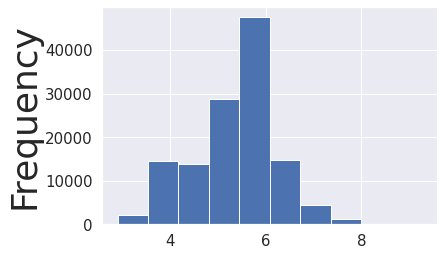

In [529]:
dados_brutos.valor_de_venda.plot(kind='hist');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


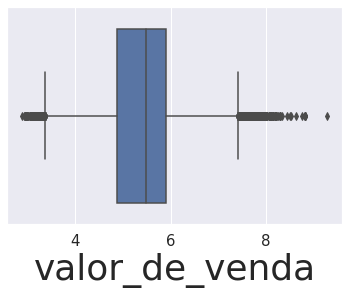

In [530]:
sns.boxplot(dados_brutos.valor_de_venda)

### Verificando produtos 

In [531]:
dados_brutos.produto.unique()

array(['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL'], dtype=object)

Gasolina

In [532]:
dados_brutos.query("produto == 'GASOLINA'").describe()

,valor_de_venda
count,48341.000000
mean,5.711579
std,0.528368
min,4.130000
25%,5.380000
50%,5.670000
75%,5.990000
max,8.750000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


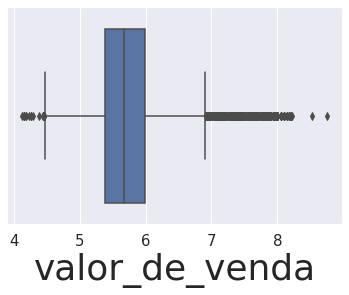

In [533]:
sns.boxplot(dados_brutos.query("produto == 'GASOLINA'").valor_de_venda)

In [534]:
dados_brutos.query("valor_de_venda > 7").estado_sigla.unique()

array(['ES', 'PI', 'RJ', 'AL', 'AM', 'BA', 'CE', 'MA', 'MG', 'PA', 'PB',
       'PE', 'RN', 'RS', 'SE', 'SP', 'TO', 'MS', 'PR', 'SC', 'GO', 'RO',
       'AC', 'MT', 'RR'], dtype=object)

# Salvando e verificando arquivo salvo

## Salvando em csv

In [535]:
dados_brutos.to_csv('dados\dados_limpos\precos_gasolina_etanol_julho_agosto.csv', sep=',', index=False)

## Verificando arquivo salvo

In [536]:
dados_novo_arquivo = pd.read_csv('dados\dados_limpos\precos_gasolina_etanol_julho_agosto.csv')
dados_novo_arquivo.head()

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA,2022-07-01,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LACE,29703-055,ETANOL,2022-07-01,5.99,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LACE,29703-055,GASOLINA,2022-07-01,7.39,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,2022-07-01,6.49,R$ / litro,IPIRANGA


In [537]:
dados_novo_arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   regiao_sigla       127176 non-null  object 
 1   estado_sigla       127176 non-null  object 
 2   municipio          127176 non-null  object 
 3   revenda            127176 non-null  object 
 4   cnpj_da_revenda    127176 non-null  object 
 5   nome_da_rua        127176 non-null  object 
 6   numero_rua         127105 non-null  object 
 7   bairro             126764 non-null  object 
 8   cep                127176 non-null  object 
 9   produto            127176 non-null  object 
 10  data_da_coleta     127176 non-null  object 
 11  valor_de_venda     127176 non-null  float64
 12  unidade_de_medida  127176 non-null  object 
 13  bandeira           127176 non-null  object 
dtypes: float64(1), object(13)
memory usage: 13.6+ MB


In [538]:
#descrever as siglas das regiões para melhor visualização das queries
dados_novo_arquivo.regiao_sigla= dados_brutos.regiao_sigla.map({'CO':'CO: Centro-Oeste', 'SE': 'SE: Sudeste', 'S':'S: Sul', 'NE': 'NE: Nordeste', 'N': 'N: Norte'})
dados_novo_arquivo.regiao_sigla

0              SE: Sudeste
1              SE: Sudeste
2              SE: Sudeste
3              SE: Sudeste
4         CO: Centro-Oeste
                ...       
127171    CO: Centro-Oeste
127172    CO: Centro-Oeste
127173    CO: Centro-Oeste
127174         SE: Sudeste
127175         SE: Sudeste
Name: regiao_sigla, Length: 127176, dtype: object

# Respondendo as perguntas

Antes de responder as perguntas foi criada uma função anônima lambda para aplicar a formatação decimal nos nosso resultados:

In [539]:
formatar = lambda x: f'{x:.2f}'

## 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma queda ou diminuição?

Primeiro, foram formados dataframes com a média dos valores de todos os tipos de combustíveis agrupados por data (gasolina, gasolina aditivada e etanol), também foi incluso a média geral (a média diária de todos os combustíveis), abaixo temos um exemplo:

In [562]:
venda_por_data_gasolina_aditivada = dados_brutos.loc[dados_brutos['produto'] == 'GASOLINA ADITIVADA'].groupby(['data_da_coleta'])['valor_de_venda'].mean().reset_index()
venda_por_data_gasolina           = dados_brutos.loc[dados_brutos['produto'] == 'GASOLINA'].groupby(['data_da_coleta'])['valor_de_venda'].mean().reset_index()
venda_por_data_etanol             = dados_brutos.loc[dados_brutos['produto'] == 'ETANOL'].groupby(['data_da_coleta'])['valor_de_venda'].mean().reset_index()
venda_por_data                    = dados_brutos.groupby(['data_da_coleta'])['valor_de_venda'].mean().reset_index()
venda_por_data.head(10)

,data_da_coleta,valor_de_venda
0,2022-07-01,6.621690
1,2022-07-04,6.077862
2,2022-07-05,6.185041
3,2022-07-06,5.959738
4,2022-07-07,5.797347
5,2022-07-08,5.783333
6,2022-07-11,5.738744
7,2022-07-12,5.782261
8,2022-07-13,5.601108
9,2022-07-14,5.661235


Com esses dataframes criados, utilizamos o matplotlib para unir essas informações em um gráfico de linha:

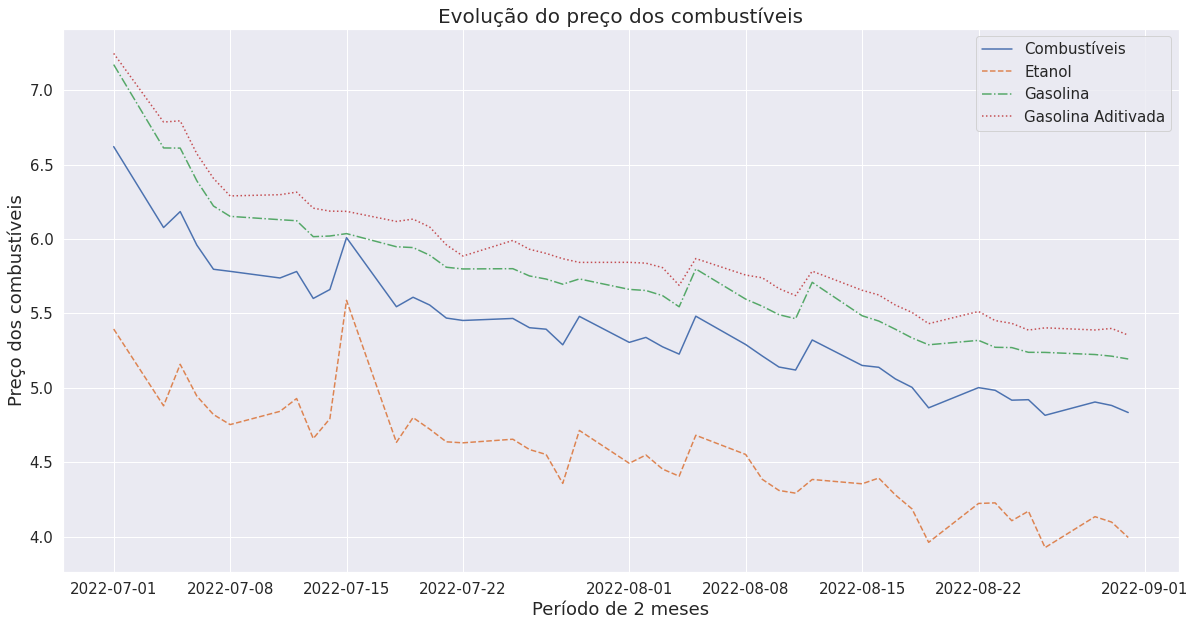

In [563]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.plot(venda_por_data['data_da_coleta'], venda_por_data['valor_de_venda'], label='Combustíveis') 
plt.plot(venda_por_data_etanol['data_da_coleta'], venda_por_data_etanol['valor_de_venda'], label='Etanol', linestyle="--")
plt.plot(venda_por_data_gasolina['data_da_coleta'], venda_por_data_gasolina['valor_de_venda'], label='Gasolina', linestyle="-.")
plt.plot(venda_por_data_gasolina_aditivada['data_da_coleta'], venda_por_data_gasolina_aditivada['valor_de_venda'], label='Gasolina Aditivada', linestyle=":")
plt.xlabel("Período de 2 meses", size=18) 
plt.ylabel("Preço dos combustíveis", size=18)  
plt.title("Evolução do preço dos combustíveis", size=20)  
plt.legend()
plt.show() 

## 2. Qual o preço médio da gasolina e do etanol nesses 2 meses?

### preço médio da gasolina nos dois meses:

In [542]:
formatar(dados_novo_arquivo.loc[dados_novo_arquivo['produto'] == 'GASOLINA']['valor_de_venda'].mean())

'5.71'

### preço médio do etanol nos dois meses:

In [543]:
formatar(dados_novo_arquivo.loc[dados_novo_arquivo['produto'] == 'ETANOL']['valor_de_venda'].mean())

'4.51'

## 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?


In [544]:
# Quais os 5 estados com preço médio mais alto?

#1. conferindo DF:

dados_uteis=dados_novo_arquivo[['estado_sigla','produto','revenda','cnpj_da_revenda','valor_de_venda']]

display(dados_uteis)

,estado_sigla,produto,revenda,cnpj_da_revenda,valor_de_venda
0,ES,GASOLINA ADITIVADA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,7.48
1,ES,GASOLINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,7.38
2,ES,ETANOL,POSTO MOTOCAP LTDA,04.814.652/0001-10,5.99
3,ES,GASOLINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,7.39
4,GO,GASOLINA ADITIVADA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,6.49
...,...,...,...,...,...
127171,DF,ETANOL,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,3.99
127172,DF,GASOLINA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,5.19
127173,DF,GASOLINA ADITIVADA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,5.19
127174,MG,GASOLINA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,5.27


In [545]:
#2. Filtrando valores:

#Tirando a média da Gasolina e do Etanol
media_gas=dados_uteis.loc[dados_uteis['produto'] == 'GASOLINA']['valor_de_venda'].mean()
media_et=dados_uteis.loc[dados_uteis['produto'] == 'ETANOL']['valor_de_venda'].mean()


In [546]:
# 3. Resgatando valores acima da média para Gasolina

gas_df=dados_uteis.loc[dados_uteis['produto'] == 'GASOLINA']
mediagas_df= gas_df.loc[gas_df['valor_de_venda'] >= media_gas]
mediagas_df.head()                     


,estado_sigla,produto,revenda,cnpj_da_revenda,valor_de_venda
1,ES,GASOLINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,7.38
3,ES,GASOLINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,7.39
6,GO,GASOLINA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,5.99
9,GO,GASOLINA,VIENA AUTO POSTO EIRELI,05.217.903/0001-42,6.69
12,PI,GASOLINA,T. M. VALENÇA LTDA.,08.570.781/0001-61,7.77


In [547]:
# 4. Resgatando valores acima da média para Etanol
eta_df=dados_uteis.loc[dados_uteis['produto'] == 'ETANOL']
mediaeta_df= eta_df.loc[eta_df['valor_de_venda'] >= media_et]
mediaeta_df.head()  

,estado_sigla,produto,revenda,cnpj_da_revenda,valor_de_venda
2,ES,ETANOL,POSTO MOTOCAP LTDA,04.814.652/0001-10,5.99
11,PI,ETANOL,T. M. VALENÇA LTDA.,08.570.781/0001-61,5.57
13,PI,ETANOL,POSTO SANTA MARIA LTDA,08.203.364/0001-80,5.57
16,PI,ETANOL,J A SILVA MERCADINHO,23.621.717/0002-37,5.49
21,PI,ETANOL,POSTO HIDROLANDIA LTDA,03.069.763/0001-87,5.45


## 4. Qual o preço médio da gasolina e do etanol por estado?

### Gasolina: 

In [548]:
gas_df.groupby(['estado_sigla']).mean()

,valor_de_venda
estado_sigla,
AC,6.211454
AL,5.944651
AM,6.188049
AP,5.107056
BA,6.030862
CE,5.955275
DF,5.600662
ES,5.796058
GO,5.518703


### Etanol:

In [549]:
eta_df.groupby(['estado_sigla']).mean()

,valor_de_venda
estado_sigla,
AC,5.376684
AL,5.240854
AM,4.952985
AP,5.896250
BA,5.074360
CE,5.482219
DF,4.749265
ES,4.963646
GO,4.060479


## 7. Qual a região que possui o maior valor médio da gasolina?

In [550]:
# 7. Qual a região que possui o maior valor médio da gasolina? 
regiao_maior_med_gas = dados_novo_arquivo[dados_novo_arquivo['produto']=='GASOLINA'].groupby(['regiao_sigla', 'produto']).aggregate( {"valor_de_venda":"mean"}).round(3).sort_values('valor_de_venda', ascending=False)
regiao_maior_med_gas.style.background_gradient(cmap='Oranges')

,,valor_de_venda
regiao_sigla,produto,
N: Norte,GASOLINA,5.972000
NE: Nordeste,GASOLINA,5.956000
S: Sul,GASOLINA,5.641000
SE: Sudeste,GASOLINA,5.616000
CO: Centro-Oeste,GASOLINA,5.582000


In [551]:
regiao_maior_med_gas.nlargest(1, columns = 'valor_de_venda')

,,valor_de_venda
regiao_sigla,produto,
N: Norte,GASOLINA,5.972


## 8. Qual a região que possui o menor valor médio do etanol?

In [552]:
# 8. Qual a região que possui o menor valor médio do etanol?
regiao_menor_med_etanol = dados_novo_arquivo[dados_novo_arquivo['produto']=='ETANOL'].groupby(['regiao_sigla', 'produto']).aggregate( {"valor_de_venda":"mean"}).round(3).sort_values('valor_de_venda')
regiao_menor_med_etanol.style.background_gradient(cmap='BuPu')


,,valor_de_venda
regiao_sigla,produto,
CO: Centro-Oeste,ETANOL,4.107000
SE: Sudeste,ETANOL,4.150000
S: Sul,ETANOL,4.842000
NE: Nordeste,ETANOL,5.246000
N: Norte,ETANOL,5.341000


In [553]:
regiao_menor_med_etanol.nsmallest(1, columns = 'valor_de_venda')

,,valor_de_venda
regiao_sigla,produto,
CO: Centro-Oeste,ETANOL,4.107


In [554]:
vl_medio_regiao = dados_novo_arquivo.groupby(['regiao_sigla', 'produto'])['valor_de_venda'].mean().reset_index()

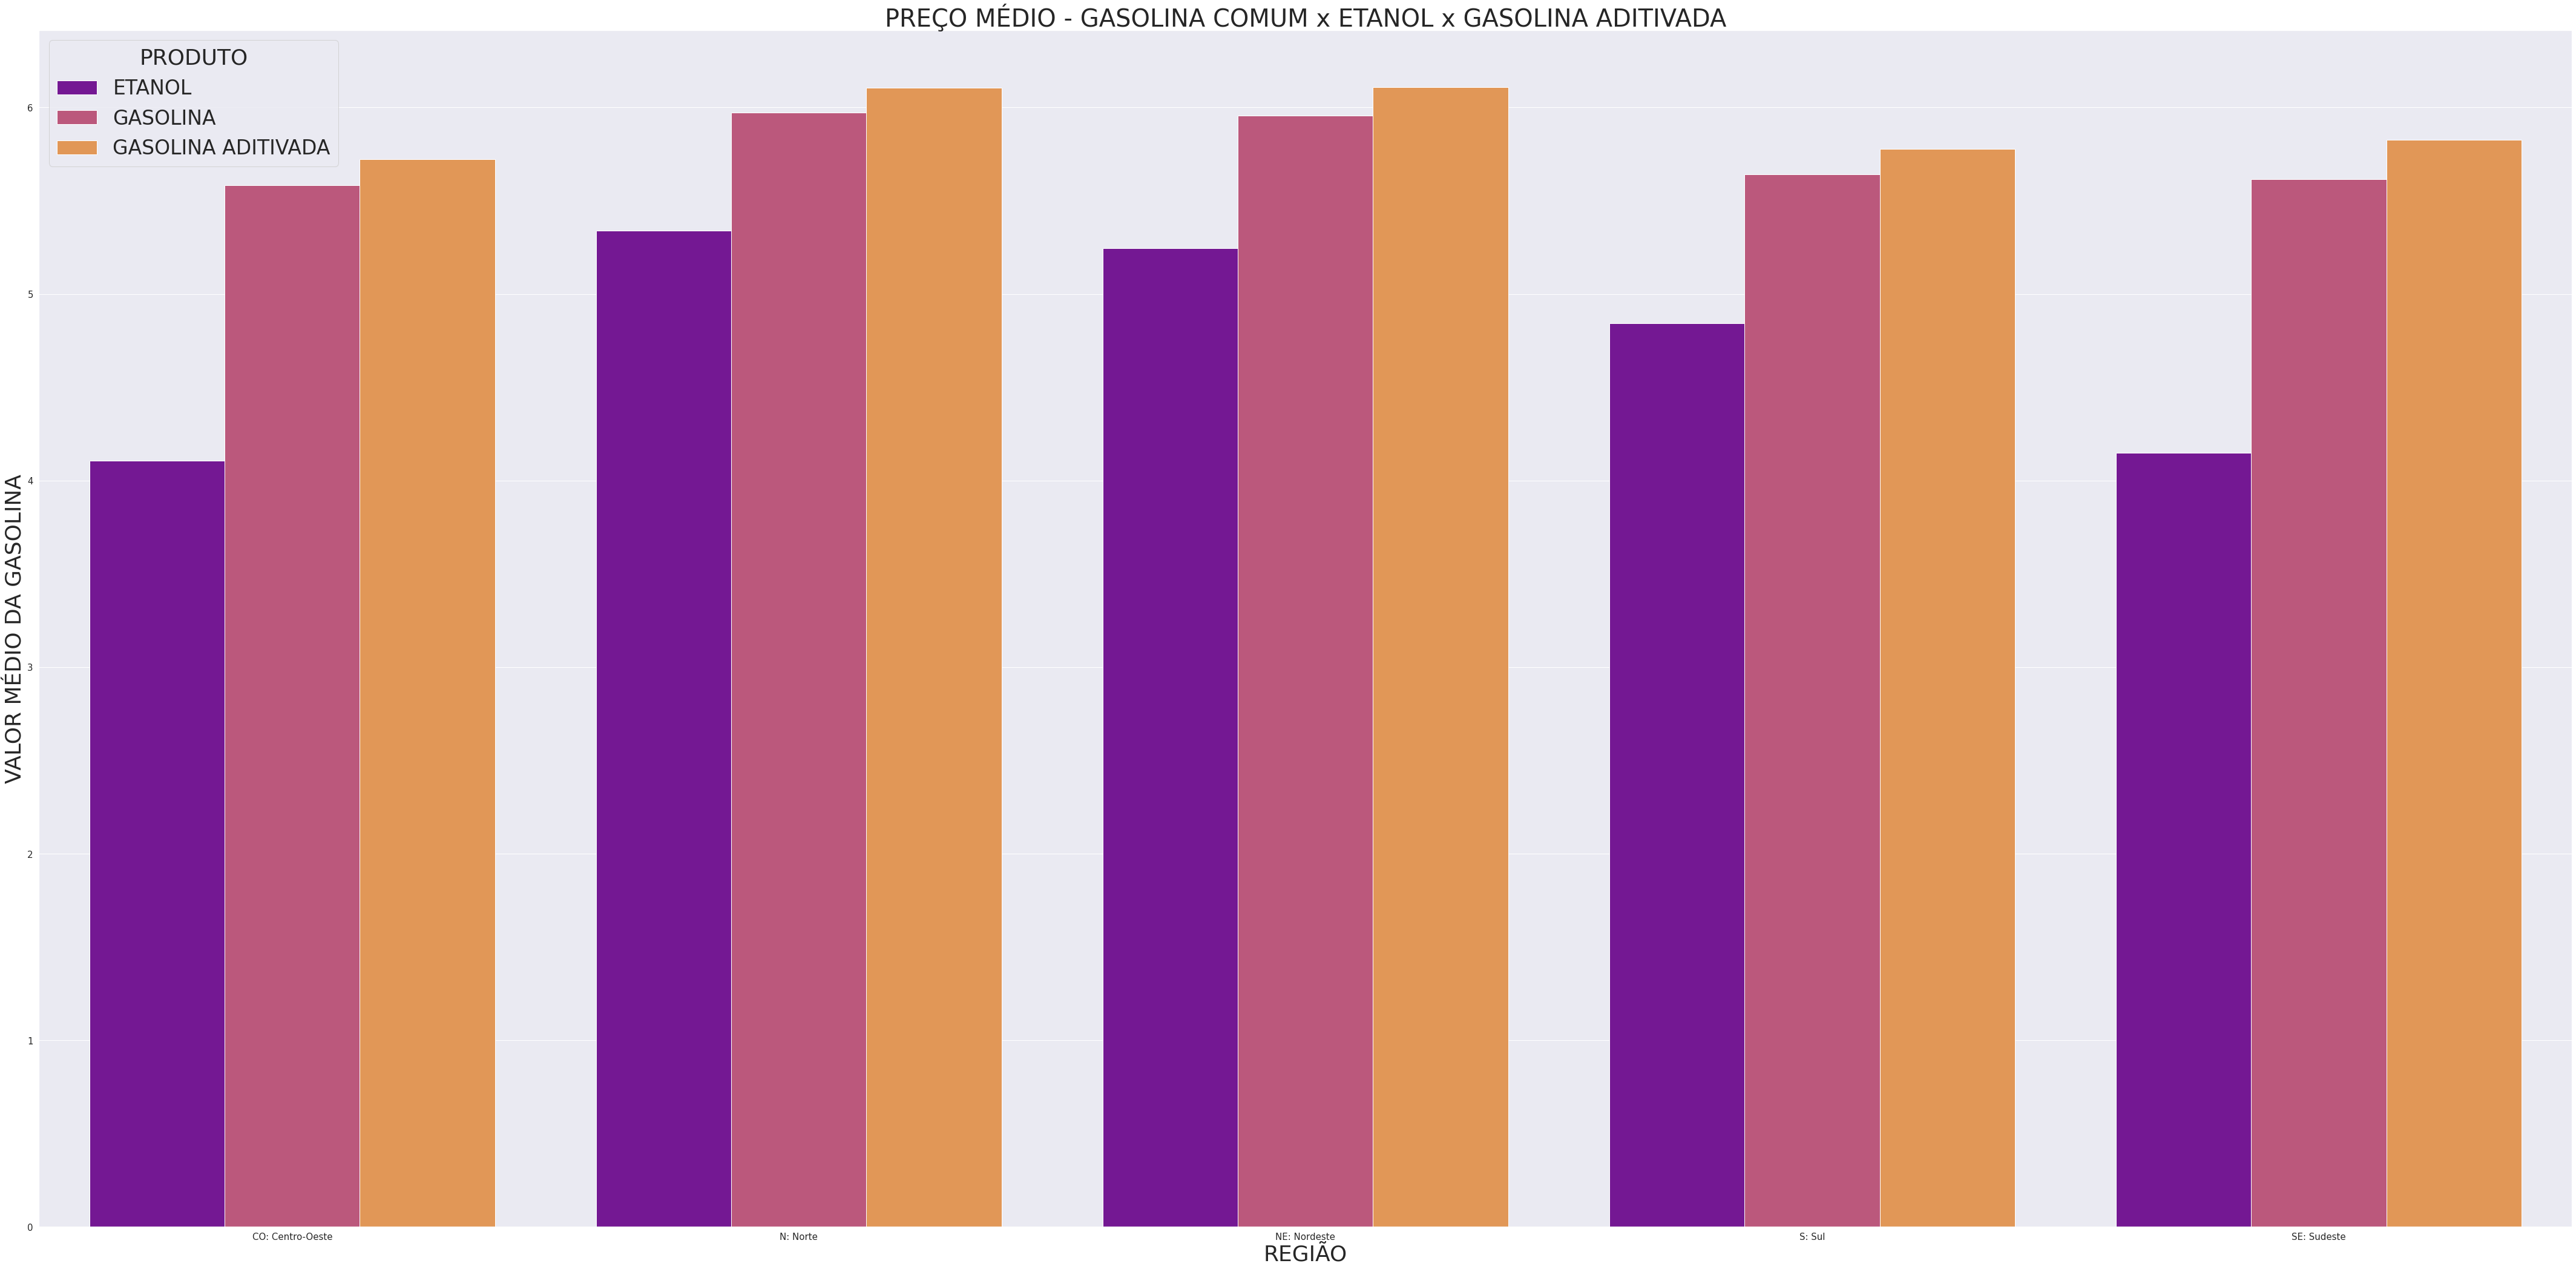

In [555]:
grafico_val_med_reg = plt.figure(figsize=(60,30))
plt.title('PREÇO MÉDIO - GASOLINA COMUM x ETANOL x GASOLINA ADITIVADA', fontsize=40)
sns.set(font_scale=3)
sns.barplot(y='valor_de_venda', x='regiao_sigla', hue='produto',  data = vl_medio_regiao, palette='plasma');
plt.ylabel('VALOR MÉDIO DA GASOLINA')
plt.xlabel('REGIÃO')
plt.legend(title="PRODUTO")

plt.tight_layout()